# Visualization of a Public Health Dataset

In this project, I will look at a dataset from [The Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/brfss/index.html 'CDC'), the national public health agency of the United States. It administers the Behavioral Risk Factor Surveillance System (BRFSS) which is the largest long-term, ongoing health survey system in the world. It is built on information from 400,000 telephone interviews with American adults conducted each year. This version of the dataset is downloaded from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) and CodeCademy provided the instructions for the project. 

In this exercise I will look into four variables: mental health, physical health, sleep time, and alcohol use. I will explore the relationships between them and visualize the data with Seaborn and Matplotlib.

### Step 1: Import necessary Python modules and ingest data

In [2]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# ensure plots are displayed properly
plt.rcParams['figure.dpi']=72

In [4]:
# load the dataset
health = pd.read_csv('BRFSS_sample.csv')

# print the first five rows
print(health.head())

  HeartDisease Smoking AlcoholDrinking Stroke  PhysicalHealth  MentalHealth  \
0           No     Yes              No     No               0             0   
1           No      No              No     No               3             0   
2           No      No              No     No              10            23   
3           No      No              No     No               0             0   
4           No     Yes              No     No               0             0   

  DiffWalking     Sex AgeCategory      Race Diabetic PhysicalActivity  \
0          No  Female       65-69     White       No              Yes   
1          No  Female       35-39     Black       No               No   
2          No  Female       18-24     White       No              Yes   
3          No  Female       50-54  Hispanic      Yes              Yes   
4          No    Male       60-64     White       No               No   

   GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0       Good          6     

In this project I will focus on the relationship between the following four variables:

- 'Mental Heatlh': The number of days in the last month that a participant experienced negative mental health symptoms
- 'Physical Heatlh': The number of days in the last month that a participant experienced physical illness or injury
- 'SleepTime': The average number of hours participants report sleeping each night
- 'AlcoholDrinking': Refers to heavy alcohol use defined as 14 or more drinks per week for adult men and 7 or more drinks per week for adult women. 

### Step 2: Initial look at the relationship between sleep and mental and physical health

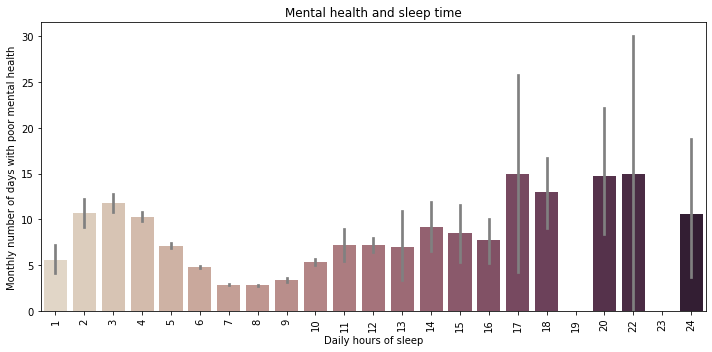

In [16]:
# bar plot of mental health and sleep time
M_health = sns.barplot(x = health.SleepTime, y = health.MentalHealth, palette = 'ch:.25', errcolor = 'grey')
M_health.set(title = 'Mental health and sleep time', xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

# rotate x tick labels
M_health.set_xticklabels(M_health.get_xticklabels(), rotation=90)

According to this barplot, the participants who sleep on average 7 or 8 hours a night report experiencing negative mental health symptoms the fewest number of days out of the month. For participants that slept 16 or more hours per day, the error bars are much larger which may indicate that there is limited data. We can confirm this by visualizing the distribution of the data using a histogram of 'SleepTime'.

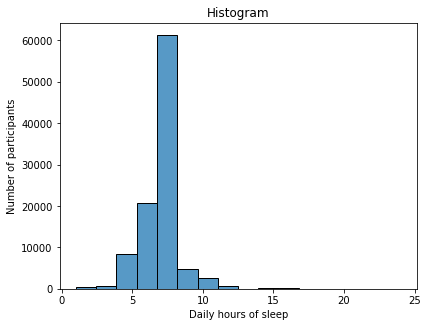

In [6]:
# histogram of 'SleepTime'
sleep_hist = sns.histplot(health.SleepTime, bins = 16)
sleep_hist.set(title = 'Histogram', xlabel = 'Daily hours of sleep', ylabel = 'Number of participants')

The histogram shows that the vast majority of participants reported sleeping 5 to 10 hours a day with very few reporting more than 13 daily hours of sleep. We can further examine the data distribution using a KDE plot of 'SleepTime'.

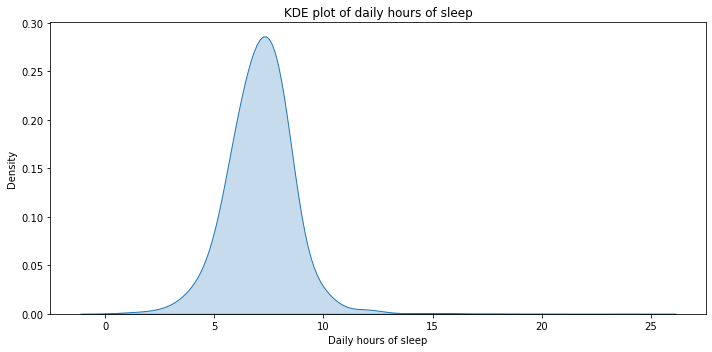

In [17]:
# KDE plot of 'SleepTime'
# use bw_adjust to smooth out the curve
sleep_kde = sns.kdeplot(health.SleepTime, fill = True, bw_adjust = 5)
sleep_kde.set(title = 'KDE plot of daily hours of sleep', xlabel = 'Daily hours of sleep')

Similarly to the histogram, the KDE plot shows that most participants sleep between four and ten hours a day. The other participants can be considered outliers. 

For the purposes of this exercise, I will exclude the outliers in order to make the plots easier to digest. In the rest of the analysis I will use a subset of the initial 'health' dataframe which will include only participants who sleep more than 2 or less than 15 hours a day.

### Step 3: Remove outliers and explore again the relationship between sleep and mental and physical health

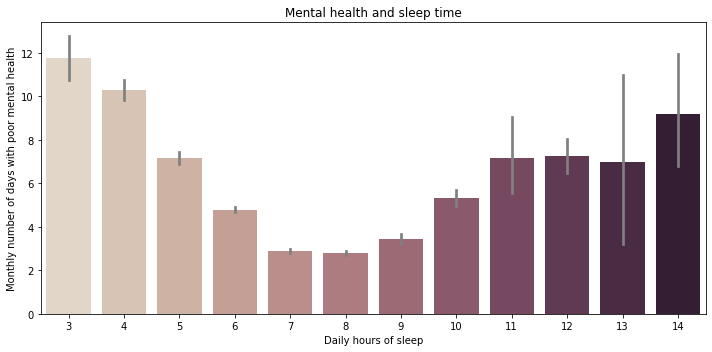

In [14]:
# subset to 3-14 hours of sleep and remove outliers
health_sub = health.loc[(health["SleepTime"] < 15) & (health["SleepTime"] > 2)]

# create a new bar plot for mental health and sleep time by using the new health_sub data
M_health = sns.barplot(x = health_sub.SleepTime, y = health_sub.MentalHealth, palette = 'ch:.25', errcolor = 'grey')
M_health.set(title = 'Mental health and sleep time', xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

The new barplot is easier to interpret and clearly shows that participants who sleep between seven and eight hours a day report experiencing the least monthly number of days with poor mental health.

In a similar way we can explore the relationship between physical health and sleep using a barplot.

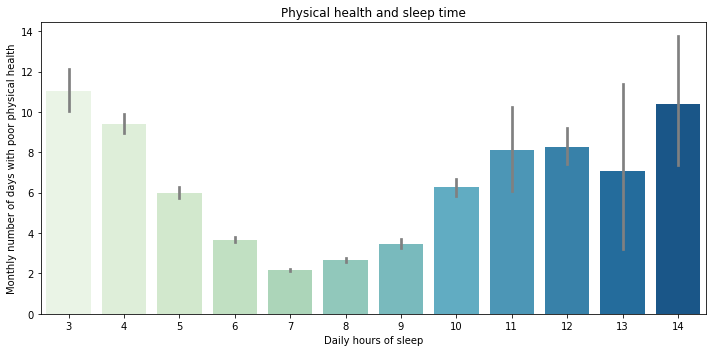

In [12]:
# bar plot for physical health and sleep time
P_health = sns.barplot(x = health_sub.SleepTime, y = health_sub.PhysicalHealth, palette = 'GnBu', errcolor = 'grey')
P_health.set(title = 'Physical health and sleep time', xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor physical health')

The barplot shows that participants who sleep between seven and eight hours a day report the least amount of days per month with poor physical health. This relationship seems similar to the relationship between mental health and sleep time. Let's display the two barplots next to each other in order to compare them more easily.

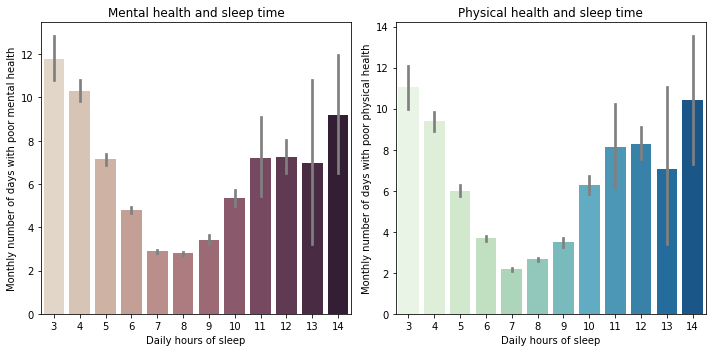

In [11]:
# change the plot size in order to include two plots next to each other
plt.rcParams["figure.autolayout"] = True
plt.rcParams["figure.figsize"] = [10.00, 5.00]
f, axes = plt.subplots(1, 2)

# barplot for relationship between mental health and sleep time
M_health = sns.barplot(x = health_sub.SleepTime, y = health_sub.MentalHealth, palette = 'ch:.25', errcolor = 'grey', ax = axes[0])
M_health.set(title = 'Mental health and sleep time',  xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

# barplot for relationship between physical health and sleep time
P_health = sns.barplot(x = health_sub.SleepTime, y = health_sub.PhysicalHealth, palette = 'GnBu', errcolor = 'grey', ax = axes[1])
P_health.set(title = 'Physical health and sleep time',  xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor physical health')

### Step 4: Experiment with a boxplot to illustrate the relationship between mental health and sleep time

In order to look at the data from a different perspective, let's use box plots instead of bar plots to look at the relationship between mental health and sleep time. Box plots display more information since they also ilustrate the spread of the data. 

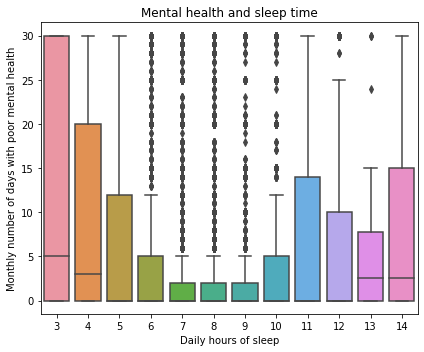

In [29]:
# reset the plot size for a single plot
plt.rcParams["figure.figsize"] = [6.00, 5.00]

# box plot for mental health and sleep time
M_boxplot = sns.boxplot(x = health_sub.SleepTime, y = health_sub.MentalHealth)
M_boxplot.set(title = 'Mental health and sleep time',  xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

By using a boxplot we can notice that there is a larger range and more spread out percentiles at the high and low end of sleep time where there is less data. We can also see that for participants who sleep six to ten hours a day, the boxes are smaller but there are a lot of outliers. These outliers make it more difficult to see the trends in the data so we will remove the outliers using 'showfliers = False'. 

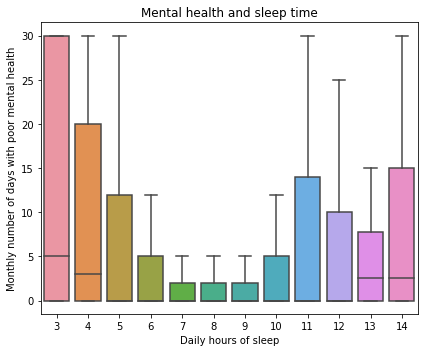

In [27]:
# box plot for mental health and sleep time without outliers
M_boxplot = sns.boxplot(x = health_sub.SleepTime, y = health_sub.MentalHealth, showfliers = False)
M_boxplot.set(title = 'Mental health and sleep time',  xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

### Step 5: Explore the relationship between sleep, mental health, and alcohol consumption

Let's split the box plots based on whether participants report heavy alcohol consumption. In this way we will illustrate the relationship between alcohol drinking and sleep and mental health.

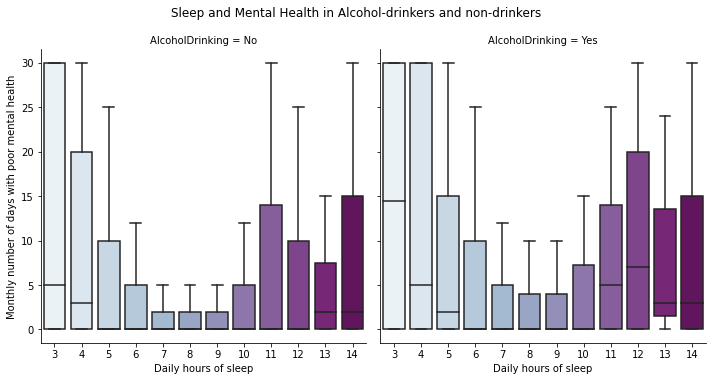

In [28]:
# create boxplots
M_A_boxplot = sns.catplot(data = health_sub, x = 'SleepTime', y = 'MentalHealth', kind = 'box', col = 'AlcoholDrinking', showfliers = False, palette ='BuPu')

# set the x and y labels
M_A_boxplot.set(xlabel = 'Daily hours of sleep', ylabel = 'Monthly number of days with poor mental health')

# set the overall title
M_A_boxplot.fig.suptitle('Sleep and Mental Health in Alcohol-drinkers and non-drinkers', y=1.05)

Displaying the two box plots next to each other shows that the monthly number of days with poor mental health are higher for participants who reported heavy use of alcohol. However, there might be significant differences in the number of people in each of the two groups in 'AlcoholDrinking'. In order to test for this possibility, we need to use a different type of plot - count plot. A count plot is used for categorical frequences in a similar way that a histogram is used for numerical frequencies.

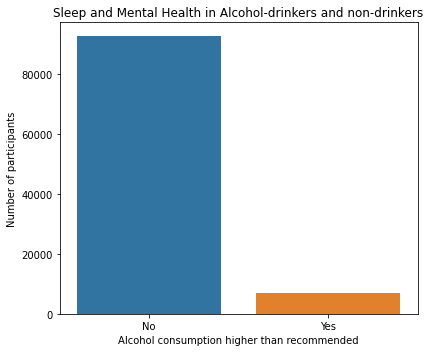

In [33]:
# count plot for 'AlcoholDrinking'
A_counts = sns.countplot(data = health_sub, x = 'AlcoholDrinking')

# set title and axes labels
A_counts.set(title = 'Sleep and Mental Health in Alcohol-drinkers and non-drinkers', xlabel = 'Alcohol consumption higher than recommended', ylabel = 'Number of participants')

As expected, significanlty fewer participants reported being heavy alcohol-drinkers.